# Experiment 23

Analysis of Phantom data from March 13, 2024

In [1]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP, analysis

In [2]:
method = 'linear'

In [3]:
path = get_project_path()
M = dataset.load_dataset11a(path)
M.shape

Data: 20240312_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20240312_GASP_PHANTOM\dixon\
Loading files: ['meas_MID112_gre_TE3p41_FID60357.dat', 'meas_MID113_gre_TE4p55_FID60358.dat', 'meas_MID114_gre_TE5p68_FID60359.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

(128, 128, 8, 3)

In [4]:
M0 = M[:,:,:,0]
M1 = M[:,:,:,1]
M2 = M[:,:,:,2]

field_map = np.angle(np.conjugate(M0) * M2)
f = np.exp(-1j * field_map / 2)
Mw = M0 + M1
Mf = M0 - M1
Mw3 = M0 + M1 * np.exp(-1j * field_map / 2)
Mf3 = M0 - M1 * np.exp(-1j * field_map / 2)

Mw = np.sqrt(np.sum(np.abs(Mw)**2, axis=2))
Mf = np.sqrt(np.sum(np.abs(Mf)**2, axis=2))
Mw3 = np.sqrt(np.sum(np.abs(Mw3)**2, axis=2))
Mf3 = np.sqrt(np.sum(np.abs(Mf3)**2, axis=2))

[]

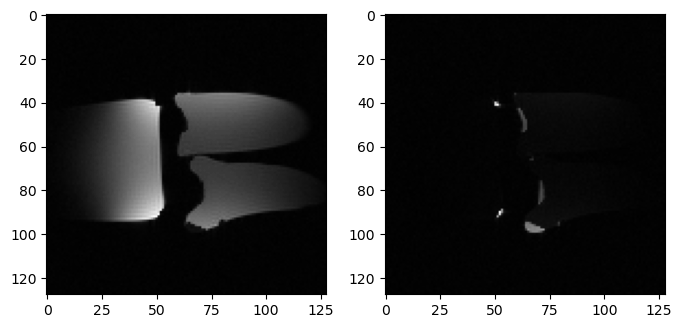

In [5]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(np.abs(Mw3), cmap='gray')
ax2.imshow(np.abs(Mf3), cmap='gray')
plt.plot()

[]

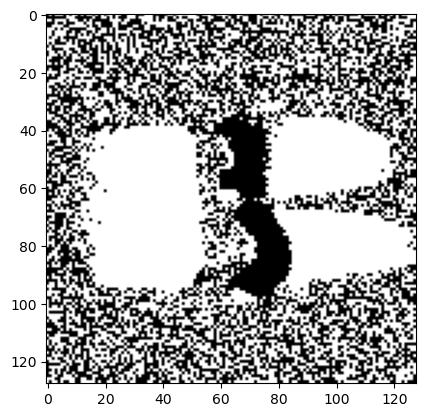

In [6]:
plt.imshow(np.angle(field_map[:,:,0]), cmap='gray')
plt.plot()

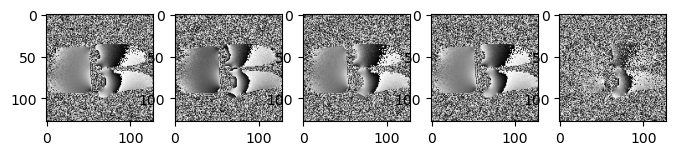

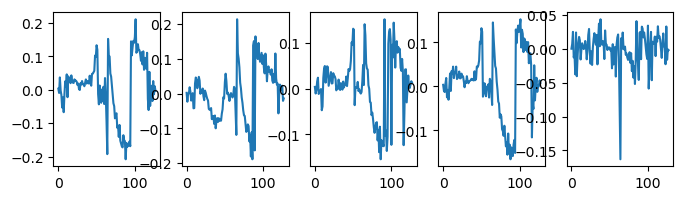

In [7]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(1, 5, 1)
ax2 = f.add_subplot(1, 5, 2)
ax3 = f.add_subplot(1, 5, 3)
ax4 = f.add_subplot(1, 5, 4)
ax5 = f.add_subplot(1, 5, 5)
ax.imshow(np.angle(M0)[:,:,0], cmap='gray')
ax2.imshow(np.angle(M1)[:,:,0], cmap='gray')
ax3.imshow(np.angle(M1 * np.exp(-1j * field_map / 2))[:,:,0], cmap='gray')
ax4.imshow(np.angle(M0 + M1 * np.exp(-1j * field_map / 2))[:,:,0], cmap='gray')
ax5.imshow(np.angle(M0 - M1 * np.exp(-1j * field_map / 2))[:,:,0], cmap='gray')
plt.plot()
plt.show()

def scale_by_mag(M):
    return np.abs(M / np.max(M))

def scale_phase_by_mag(M):
    return np.abs(M / np.max(M)) * np.angle(M)

f = plt.figure(figsize=(8,2))
ax = f.add_subplot(1, 5, 1)
ax2 = f.add_subplot(1, 5, 2)
ax3 = f.add_subplot(1, 5, 3)
ax4 = f.add_subplot(1, 5, 4)
ax5 = f.add_subplot(1, 5, 5)
ax.plot(scale_phase_by_mag(M0)[50,:,0])
ax2.plot(scale_phase_by_mag(M1)[50,:,0])
ax3.plot(scale_phase_by_mag(M1 * np.exp(-1j * field_map / 2))[50,:,0])
ax4.plot(scale_phase_by_mag(M0 + M1 * np.exp(-1j * field_map / 2))[50,:,0])
ax5.plot(scale_phase_by_mag(M0 - M1 * np.exp(-1j * field_map / 2))[50,:,0])
plt.plot()
plt.show()